In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
musicPrefDF = pd.read_csv("Music Preferences (Responses) - Form Responses 1.csv")

musicPrefDF.head()

,Timestamp,What is your academic year?,What is your gender?,What is your primary major or area of study?,What is your favorite music genre?,How many hours per day do you typically listen to music?,When do you listen to music the most?,What days do you listen to music the most?,Where do you most often listen to music?,Why do you listen to the type of music you selected?,Why do you listen to music in general?,What platform do you use to stream music?,Why did you choose this platform?
0,1/31/2026 16:19:23,Sophomore,Female,Business,Country,1–2 hours,Throughout the day,Weekends,In the car,Vibes,Relaxation,Spotify,Quality
1,1/31/2026 16:20:17,Sophomore,Male,Health Sciences,Country,1–2 hours,Throughout the day,Both equally,On campus,Lyrics,Entertainment,Apple Music,Other
2,1/31/2026 16:20:20,Sophomore,Male,Exercise Science,"Rock, R&B / Soul, Jazz, Classical, Indie / Alt...",3–4 hours,Throughout the day,Both equally,In the car,Instruments,Relaxation,Apple Music,Interface
3,1/31/2026 16:21:04,Sophomore,Female,Business,"Country, Folk",1–2 hours,Throughout the day,Both equally,In the car,Vibes,Entertainment,Spotify,Quality
4,1/31/2026 16:21:10,Senior,Female,Social Sciences,"R&B / Soul, Indie / Alternative, Folk",3–4 hours,Afternoon,Both equally,On campus,Emotional connection,Stress relief,Spotify,Price


Who: Should find percentages from each "who" question

In [3]:
academicYearDF = (musicPrefDF
        .groupby("What is your academic year?")
        .size()
        .reset_index(name="count"))

academicYearDF["percentage"] = (academicYearDF["count"] / academicYearDF["count"].sum() * 100)

academicYearDF["percentage"] = academicYearDF["percentage"]

print(academicYearDF)


  What is your academic year?  count  percentage
0                    Freshman      1    6.666667
1                      Junior      4   26.666667
2                      Senior      1    6.666667
3                   Sophomore      9   60.000000


In [4]:
genderDF = (musicPrefDF
        .groupby("What is your gender?")
        .size()
        .reset_index(name="count"))

genderDF["percentage"] = (genderDF["count"] / genderDF["count"].sum() * 100)

genderDF["percentage"] = genderDF["percentage"]

print(genderDF)

  What is your gender?  count  percentage
0               Female      7   46.666667
1                 Male      8   53.333333


In [5]:
majorDF = (musicPrefDF
        .groupby("What is your primary major or area of study?")
        .size()
        .reset_index(name="count"))

majorDF["percentage"] = (majorDF["count"] / majorDF["count"].sum() * 100)

majorDF["percentage"] = majorDF["percentage"]

print(majorDF)

  What is your primary major or area of study?  count  percentage
0                                     Business      4   28.571429
1                             Exercise Science      1    7.142857
2                              Health Sciences      2   14.285714
3                                         STEM      4   28.571429
4                              Social Sciences      2   14.285714
5                Sport Leadership and Strategy      1    7.142857


What: 
If multiple choice
What percentage of users checked each reply from the what question
If a numerical answer
what was average, min, and max? Mode if applicable.

In [6]:
# had to use for loop to seperate out the genres, I let the responders select more than one genre
# of music as their favorie because I feel like just one genre is too constricting
totalGenreOptions = 14


genreColumn = "What is your favorite music genre?"
genreCountDict = {}
for response in musicPrefDF[genreColumn].dropna():
    genres = response.split(", ")
    
    for genre in genres:
        if genre in genreCountDict:
            genreCountDict[genre] += 1
        else:
            genreCountDict[genre] = 1

genreDF = pd.DataFrame(genreCountDict.items(),columns=["genre", "count"])
genreDF.head()
genreDF["percentage"] = (genreDF["count"] / totalGenreOptions * 100)

print(genreDF)
print("count")

                  genre  count  percentage
0               Country      6   42.857143
1                  Rock      8   57.142857
2            R&B / Soul      2   14.285714
3                  Jazz      1    7.142857
4             Classical      1    7.142857
5   Indie / Alternative      6   42.857143
6                  Folk      4   28.571429
7     Worship/religious      3   21.428571
8                   Pop      6   42.857143
9         Hip-Hop / Rap      5   35.714286
10                Metal      2   14.285714
11        Southern Rock      1    7.142857
12                K-Pop      1    7.142857
13     Electronic / EDM      1    7.142857
count


When: Percentage of each option

In [9]:
dailyHoursDF = (musicPrefDF
        .groupby("How many hours per day do you typically listen to music?")
        .size()
        .reset_index(name="count"))

dailyHoursDF["percentage"] = (dailyHoursDF["count"] / dailyHoursDF["count"].sum() * 100)

dailyHoursDF["percentage"] = dailyHoursDF["percentage"]

print(dailyHoursDF)

  How many hours per day do you typically listen to music?  count  percentage
0                                          1–2 hours            9   60.000000
1                                          3–4 hours            5   33.333333
2                                   Less than 1 hour            1    6.666667


In [11]:
def getAverageHours():
    avgHours = (.5 * 1 + 5 * 3.5 + 9 * 1.5)/15
    return avgHours

getAverageHours()

2.1

In [12]:
# i finally realized I shoulda made a def getPercentages function so I didn't have to copy and paste

def getPercentages(columnName):
    outputDF = (
        musicPrefDF
            .dropna(subset=[columnName])
            .groupby(columnName)
            .size()
            .reset_index(name="count"))

    outputDF["percentage"] = (
        outputDF["count"] / outputDF["count"].sum() * 100)

    return outputDF

getPercentages("When do you listen to music the most?")

,When do you listen to music the most?,count,percentage
0,Afternoon,1,6.666667
1,Evening,1,6.666667
2,Morning,1,6.666667
3,Throughout the day,12,80.000000


In [13]:
#  this code won't work until you run the def getPercentages kernal first

getPercentages("What platform do you use to stream music?")

,What platform do you use to stream music?,count,percentage
0,Apple Music,6,40.000000
1,Other,1,6.666667
2,Spotify,7,46.666667
3,Youtube,1,6.666667


In [14]:
getPercentages("What days do you listen to music the most?")

,What days do you listen to music the most?,count,percentage
0,Both equally,9,60.000000
1,Weekdays,4,26.666667
2,Weekends,2,13.333333


Where: Percentage of each option

In [15]:
getPercentages("Where do you most often listen to music?")

,Where do you most often listen to music?,count,percentage
0,At home (or dorm),2,13.333333
1,In the car,11,73.333333
2,On campus,2,13.333333


Why: Percentage of each option

In [16]:
getPercentages("Why do you listen to the type of music you selected?")

,Why do you listen to the type of music you selected?,count,percentage
0,Emotional connection,4,26.666667
1,Instruments,1,6.666667
2,Lyrics,2,13.333333
3,Vibes,8,53.333333


In [17]:
getPercentages("Why do you listen to music in general?")

,Why do you listen to music in general?,count,percentage
0,Entertainment,6,40.000000
1,Focus / studying,2,13.333333
2,Other,1,6.666667
3,Relaxation,2,13.333333
4,Stress relief,4,26.666667


In [18]:
getPercentages("Why did you choose this platform?")

,Why did you choose this platform?,count,percentage
0,Interface,3,20.0
1,Other,3,20.0
2,Price,3,20.0
3,Quality,6,40.0


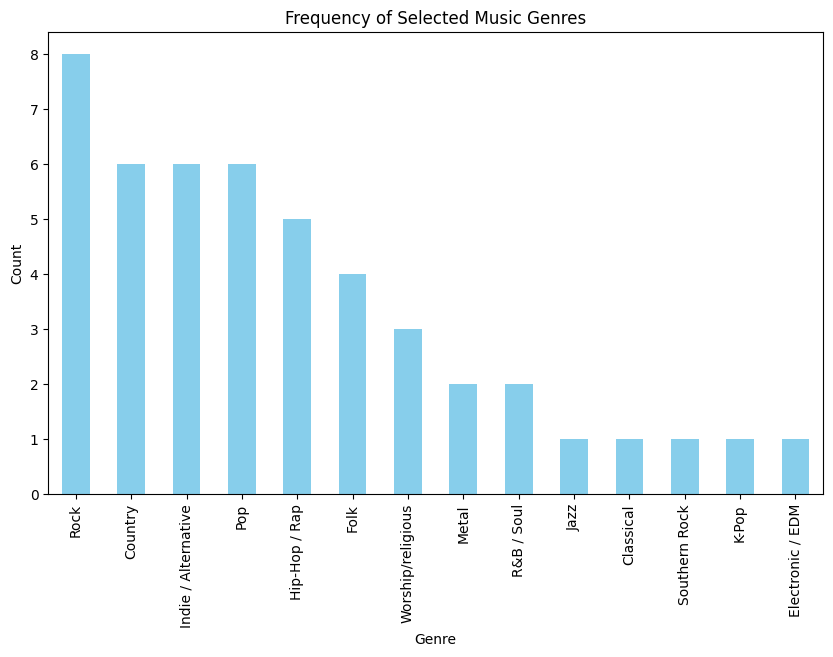

In [19]:

genres = musicPrefDF["What is your favorite music genre?"].str.split(", ")
genre_counts = genres.explode().value_counts()

plt.figure(figsize=(10,6))
genre_counts.plot(kind="bar", color="skyblue")
plt.title("Frequency of Selected Music Genres")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()


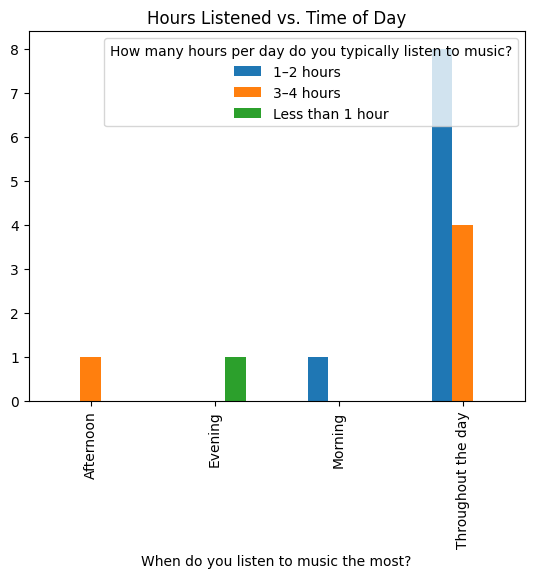

In [21]:
pd.crosstab(musicPrefDF["When do you listen to music the most?"], musicPrefDF["How many hours per day do you typically listen to music?"]).plot(kind="bar")
plt.title("Hours Listened vs. Time of Day")
plt.show()


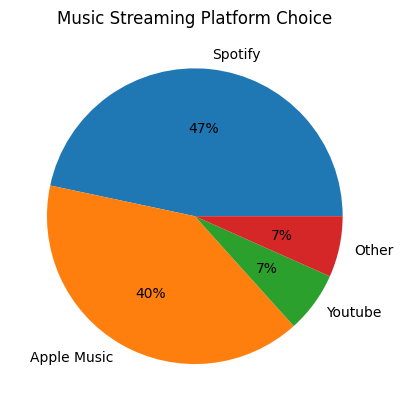

In [22]:
musicPrefDF["What platform do you use to stream music?"].value_counts().plot(kind="pie", autopct="%1.0f%%")
plt.title("Music Streaming Platform Choice")
plt.ylabel("")
plt.show()
